In [182]:
import numpy as np
import pandas as pd  
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import time

In [183]:
df=pd.read_csv('wdbc.csv', header = None)
df = pd.DataFrame(df)
ds = df.replace('M', 1)
ds = ds.replace('B', 0)

ds.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,42302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [184]:
x=ds.iloc[:, 2:32]
del ds[0]
y=ds.iloc[:, 0:1]


In [185]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
min_max_scaler = preprocessing.MinMaxScaler()
y_scaled = min_max_scaler.fit_transform(y)

print(x_scaled)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T
x_val = x_val.T
y_val = y_val.T

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]
x train:  (30, 455)
x test:  (30, 57)
y train:  (1, 455)
y test:  (1, 57)


In [186]:
def initialize_weights_and_bias(dimension):
    w = np.zeros(shape=(dimension, 1))
    b = 0.0
    return w, b

In [187]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head    

In [188]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]  
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1] 
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    
    return cost,gradients

In [189]:
def update(w, b, x_train, y_train, learning_rate, number_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    y_list= []
    for i in range(number_of_iteration):
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        #update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
        y_prediction = predict(w,b,x_train)    
        y_list.append(100 - np.mean(np.abs(y_prediction - y_train)) * 100)
        
    print(w)
    print(b)

    parameters = {"weight": w,"bias": b, "y_list" : y_list}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients, cost_list, y_list

In [190]:
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [191]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    parameters, gradients, cost_list, y_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    Accuracy = y_list
    plt.plot(Accuracy)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Accuracy")
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
    TP = 0
    TN = 0
    FN = 0
    FP = 0

    predList = y_prediction_train.tolist()
    tlist = y_train.tolist()

    array_length = len(predList[0])
    for i in range(array_length):
        if predList[0][i] == 1 and tlist[0][i] == 1:
            TP += 1
        elif predList[0][i] == 0 and tlist[0][i] == 0:
            TN += 1
        elif predList[0][i] == 0 and tlist[0][i] == 1:
            FN += 1
        elif predList[0][i] == 1 and tlist[0][i] == 0 :
            FP += 1
        else:
            print(predList[0][i])
            print(tlist[0][i])
    tpr = TP / (TP + FN) * 100
    fpr = FP / (FP + TN) * 100
    precision = TP / (TP + FP) * 100
    print("On training set:\nTrue Positive:  ", TP)
    print("True Negative:  ", TN)
    print("False Negative:  ", FN)
    print("False Positive:  ", FP)
    print("True Positive Rate / Recall: %.2f" % tpr+str('%'))
    print("Precision: %.2f" %precision+str('%'))
    print("False Positive Rate / Fallout: %.2f" %fpr+str('%'))

    TP = 0
    TN = 0
    FN = 0
    FP = 0
    predList = y_prediction_test.tolist()
    tlist = y_test.tolist()

    array_length = len(predList[0])
    for i in range(array_length):
        if predList[0][i] == 1 and tlist[0][i] == 1:
            TP += 1
        elif predList[0][i] == 0 and tlist[0][i] == 0:
            TN += 1
        elif predList[0][i] == 0 and tlist[0][i] == 1:
            FN += 1
        elif predList[0][i] == 1 and tlist[0][i] == 0 :
            FP += 1
        else:
            print(predList[0][i])
            print(tlist[0][i])
    tpr = TP / (TP + FN) * 100
    fpr = FP / (FP + TN) * 100
    precision = TP / (TP + FP) * 100
    print("On Test set:\nTrue Positive:  ", TP)
    print("True Negative:  ", TN)
    print("False Negative:  ", FN)
    print("False Positive:  ", FP)
    print("True Positive Rate / Recall: %.2f" % tpr+str('%'))
    print("Precision: %.2f" %precision+str('%'))
    print("False Positive Rate / Fallout: %.2f" %fpr+str('%'))


In [192]:
def __init__():

    d = logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 5000)
    
    

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.222965
Cost after iteration 200: 0.173494
Cost after iteration 300: 0.150556
Cost after iteration 400: 0.136398
Cost after iteration 500: 0.126518
Cost after iteration 600: 0.119127
Cost after iteration 700: 0.113339
Cost after iteration 800: 0.108653
Cost after iteration 900: 0.104763
Cost after iteration 1000: 0.101466
Cost after iteration 1100: 0.098627
Cost after iteration 1200: 0.096149
Cost after iteration 1300: 0.093959
Cost after iteration 1400: 0.092007
Cost after iteration 1500: 0.090250
Cost after iteration 1600: 0.088658
Cost after iteration 1700: 0.087205
Cost after iteration 1800: 0.085872
Cost after iteration 1900: 0.084643
Cost after iteration 2000: 0.083504
Cost after iteration 2100: 0.082445
Cost after iteration 2200: 0.081455
Cost after iteration 2300: 0.080528
Cost after iteration 2400: 0.079657
Cost after iteration 2500: 0.078835
Cost after iteration 2600: 0.078059
Cost after iteration 2700: 0.077323
Cost

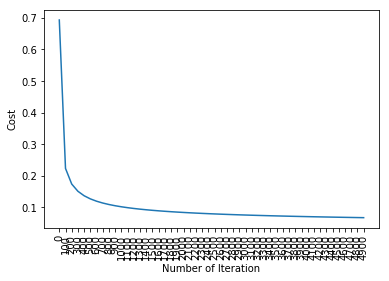

train accuracy: 98.46153846153847 %
test accuracy: 96.49122807017544 %
On training set:
True Positive:   164
True Negative:   284
False Negative:   5
False Positive:   2
True Positive Rate / Recall: 97.04%
Precision: 98.80%
False Positive Rate / Fallout: 0.70%
On Test set:
True Positive:   25
True Negative:   30
False Negative:   2
False Positive:   0
True Positive Rate / Recall: 92.59%
Precision: 100.00%
False Positive Rate / Fallout: 0.00%


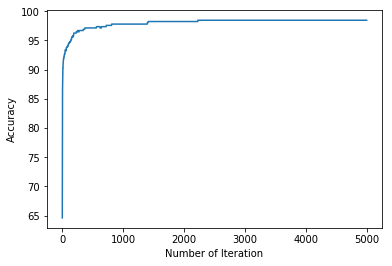

In [193]:
__init__()